In [14]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])

#rename columns
df.rename(columns={'Working Professional or Student': 'Working Student', 'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts', 'Family History of Mental Illness':'Family Mental Illness' }, inplace=True)

# Convert all column names to snake_case
df.columns = (
    df.columns
    .str.strip()                              # remove leading/trailing spaces
    .str.replace(' ', '_')                    # replace spaces with underscores
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)  # remove special characters
    .str.lower()            
                      # convert to lowercase (optional)
)

# View result
df.head()

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [15]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                            0
name                          0
gender                        0
age                           0
city                          0
working_student               0
profession                36630
academic_pressure        112803
work_pressure             27918
cgpa                     112802
study_satisfaction       112803
job_satisfaction          27910
sleep_duration                0
dietary_habits                4
degree                        2
suicidal_thoughts             0
workstudy_hours               0
financial_stress              4
family_mental_illness         0
depression                    0
dtype: int64

In [16]:
# Preprocessing
# Convert Yes/No columns to binary (1/0)
df = df.map(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
# Make working_student binary: 1 if working, 0 if student
df['working_student'] = df['working_student'].map({'Working Professional': 1, 'Student': 0})
# Convert gender to binary: Male = 1, Female = 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
# remove sleep_duration occurences that have less than 10 appearences
df = df[df['sleep_duration'].isin(df['sleep_duration'].value_counts()[df['sleep_duration'].value_counts() >= 10].index)]
# remove dietary_habits occurences that have less than 10 appearences
df = df[df['dietary_habits'].isin(df['dietary_habits'].value_counts()[df['dietary_habits'].value_counts() >= 10].index)]
# Set dietary_habits Unhealthy(0) Moderate(1) Healthy (2)
df["dietary_habits"] = df["dietary_habits"].map({
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2
})
#if profession is student then make profession "Student"
df.loc[df["working_student"] == 0, "profession"] = "Student"
#If profession is still NaN, set to "Unemployed"
df.loc[df["profession"].isna(), "profession"] = "Unemployed"
#Map sleeping hours to numbers
sleep_mapping = {
    "Less than 5 hours": 0,
    "5-6 hours": 1,
    "7-8 hours": 2,
    "More than 8 hours": 3   # if you have this category
}
df["sleep_duration"] = df["sleep_duration"].map(sleep_mapping)

#print 
display(df.isna().sum())
display(df.sample(10))

id                            0
name                          0
gender                        0
age                           0
city                          0
working_student               0
profession                    0
academic_pressure        112737
work_pressure             27890
cgpa                     112736
study_satisfaction       112737
job_satisfaction          27882
sleep_duration               12
dietary_habits                0
degree                        2
suicidal_thoughts             0
workstudy_hours               0
financial_stress              4
family_mental_illness         0
depression                    0
dtype: int64

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
74459,74459,Shrey,1,28.0,Vasai-Virar,1,Teacher,NaN,1.0,NaN,NaN,3.0,3.0,0,B.Ed,1,4.0,2.0,0,0
29325,29325,Tanya,0,30.0,Lucknow,0,Student,3.0,NaN,7.92,2.0,NaN,2.0,0,BHM,0,9.0,3.0,0,0
126792,126792,Shivam,1,36.0,Ahmedabad,1,Graphic Designer,NaN,1.0,NaN,NaN,4.0,1.0,2,B.Tech,1,7.0,1.0,0,0
118963,118963,Vidya,0,47.0,Agra,1,Teacher,NaN,2.0,NaN,NaN,2.0,2.0,1,B.Arch,1,12.0,3.0,0,0
70059,70059,Eshita,0,29.0,Vadodara,1,Pharmacist,NaN,3.0,NaN,NaN,4.0,3.0,1,B.Pharm,0,2.0,2.0,1,0
5551,5551,Ritvik,1,38.0,Meerut,1,Doctor,NaN,3.0,NaN,NaN,3.0,0.0,1,MD,0,11.0,1.0,0,0
88340,88340,Riya,0,39.0,Kalyan,1,Digital Marketer,NaN,1.0,NaN,NaN,1.0,0.0,0,B.Com,1,9.0,5.0,0,0
65299,65299,Ishan,1,39.0,Ahmedabad,1,Software Engineer,NaN,2.0,NaN,NaN,1.0,1.0,1,M.Tech,0,0.0,4.0,1,0
24467,24467,Sanket,1,49.0,Delhi,1,Chemist,NaN,3.0,NaN,NaN,2.0,2.0,2,MBBS,1,6.0,5.0,0,1
38252,38252,Ishwar,1,53.0,Indore,1,Plumber,NaN,5.0,NaN,NaN,5.0,1.0,2,PhD,0,12.0,2.0,1,0


In [17]:
#Now we want to split it into 2 datasets, students and workers
students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

display(students_df)

,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
2,2,Yuvraj,1,33.0,Visakhapatnam,Student,5.0,8.97,2.0,1.0,2,B.Pharm,1,3.0,1.0,0,1
8,8,Aishwarya,0,24.0,Bangalore,Student,2.0,5.90,5.0,1.0,1,BSc,0,3.0,2.0,1,0
26,26,Aditya,1,31.0,Srinagar,Student,3.0,7.03,5.0,0.0,2,BA,0,9.0,1.0,1,0
30,30,Prisha,0,28.0,Varanasi,Student,3.0,5.59,2.0,2.0,1,BCA,1,4.0,5.0,1,1
32,32,Chhavi,0,25.0,Jaipur,Student,4.0,8.13,3.0,1.0,1,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,0,27.0,Surat,Student,5.0,5.75,5.0,1.0,0,Class 12,1,7.0,1.0,1,0
140686,140686,Rohan,1,27.0,Ludhiana,Student,2.0,9.40,3.0,0.0,2,MSc,0,0.0,3.0,1,0
140689,140689,Ayaan,1,31.0,Faridabad,Student,3.0,6.61,4.0,1.0,0,MD,0,12.0,2.0,0,0
140690,140690,Rashi,0,18.0,Ludhiana,Student,5.0,6.88,2.0,0.0,2,Class 12,1,10.0,5.0,0,1


In [ ]:
#scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

student_numeric_cols = students_df.select_dtypes(include=["number"]).columns.drop({'id', 'gender', 'suicidal_thoughts', 'family_mental_illness', 'depression'})
students_df[student_numeric_cols] = scaler.fit_transform(students_df[student_numeric_cols])

working_numeric_cols = working_df.select_dtypes(include=["number"]).columns.drop({'id', 'gender', 'suicidal_thoughts', 'family_mental_illness', 'depression'})
working_df[working_numeric_cols] = scaler.fit_transform(working_df[working_numeric_cols])

display(students_df)
display(working_df)

,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
2,2,Yuvraj,1,0.365854,Visakhapatnam,Student,1.00,0.792757,0.25,0.333333,1.0,B.Pharm,1,0.250000,0.00,0,1
8,8,Aishwarya,0,0.146341,Bangalore,Student,0.25,0.175050,1.00,0.333333,0.5,BSc,0,0.250000,0.25,1,0
26,26,Aditya,1,0.317073,Srinagar,Student,0.50,0.402414,1.00,0.000000,1.0,BA,0,0.750000,0.00,1,0
30,30,Prisha,0,0.243902,Varanasi,Student,0.50,0.112676,0.25,0.666667,0.5,BCA,1,0.333333,1.00,1,1
32,32,Chhavi,0,0.170732,Jaipur,Student,0.75,0.623742,0.50,0.333333,0.5,M.Tech,1,0.083333,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,0,0.219512,Surat,Student,1.00,0.144869,1.00,0.333333,0.0,Class 12,1,0.583333,0.00,1,0
140686,140686,Rohan,1,0.219512,Ludhiana,Student,0.25,0.879276,0.50,0.000000,1.0,MSc,0,0.000000,0.50,1,0
140689,140689,Ayaan,1,0.317073,Faridabad,Student,0.50,0.317907,0.75,0.333333,0.0,MD,0,1.000000,0.25,0,0
140690,140690,Rashi,0,0.000000,Ludhiana,Student,1.00,0.372233,0.25,0.000000,1.0,Class 12,1,0.833333,1.00,0,1


,id,name,gender,age,city,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,0,0.738095,Ludhiana,Chef,1.00,0.25,1.000000,1.0,BHM,0,0.083333,0.25,0,0
1,1,Vivan,1,0.190476,Varanasi,Teacher,0.75,0.50,0.000000,0.0,LLB,1,0.583333,0.50,0,1
3,3,Yuvraj,1,0.095238,Mumbai,Teacher,1.00,0.00,0.000000,0.5,BBA,1,0.833333,0.00,1,1
4,4,Rhea,0,0.285714,Kanpur,Business Analyst,0.00,0.00,0.333333,0.0,BBA,1,0.750000,0.75,1,0
5,5,Vani,0,0.976190,Ahmedabad,Finanancial Analyst,0.25,1.00,0.333333,1.0,MCA,0,0.583333,1.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Ishaani,0,0.642857,Ahmedabad,Teacher,0.25,1.00,0.000000,0.5,B.Ed,1,0.083333,1.00,0,0
140695,140695,Vidya,0,0.000000,Ahmedabad,Unemployed,1.00,0.75,0.333333,0.0,Class 12,0,0.166667,0.75,1,1
140696,140696,Lata,0,0.547619,Hyderabad,Content Writer,1.00,0.75,0.666667,0.5,B.Tech,1,0.500000,1.00,1,0
140697,140697,Aanchal,0,0.142857,Kolkata,Marketing Manager,0.50,0.00,1.000000,0.5,B.Com,0,0.333333,0.75,0,0


In [ ]:
# from OurModels import LinearRegressionModel
# model = LinearRegressionModel()
# modelResults = model.train(students_df)
# model.output(*modelResults)  # unpack y_pred, y_test
# model.charts(*modelResults)


📊 SVC Model Performance
----------------------------------------
Accuracy : 0.8488
Precision: 0.8485
Recall   : 0.8488
F1 Score : 0.8480
ROC AUC  : N/A (probabilities not available)
----------------------------------------


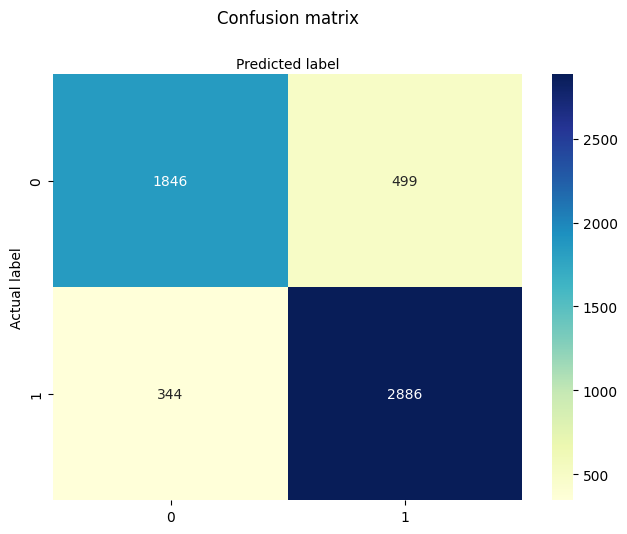

In [20]:
from OurModels import SVCModel
model = SVCModel()
modelResults = model.train(students_df)
model.charts(*modelResults)
model.output(*modelResults)